In [1]:
 #Sentiment Analysis on Twitter Data

In [20]:
pip install tweepy pandas numpy matplotlib seaborn nltk scikit-learn wordcloud textblob vaderSentiment

   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ------ -------------------------------- 20.5/126.0 kB 640.0 kB/s eta 0:00:01
   -------------------------------- ------- 102.4/126.0 kB 1.2 MB/s eta 0:00:01
   -------------------------------------- 126.0/126.0 kB 925.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Access Twitter Data using Tweepy

In [ ]:
import tweepy

# Replace these with your credentials
api_key = "Your Key"
api_secret = "Your Key"
access_token = "Your Key"
access_token_secret = "Your Key"

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)


In [5]:
#Fetch Tweets

In [ ]:
import tweepy

# Replace with your credentials
bearer_token = "Your Key"
client = tweepy.Client(bearer_token=bearer_token)

# Query for tweets
query = "mental health -is:retweet lang:en"  # v2 syntax: -is:retweet instead of -filter:retweets
tweets = client.search_recent_tweets(query=query, max_results=100, tweet_fields=["created_at", "author_id"])

# Collect tweet data
tweet_list = [[tweet.created_at, tweet.author_id, tweet.text] for tweet in tweets.data]
#print(tweet_list)

[[datetime.datetime(2025, 4, 25, 19, 40, 43, tzinfo=datetime.timezone.utc), 377321639, 'Appreciate this post that explains the importance of #SpeakYourMind…supporting mental health. Thank you @rohrbachsci for always being a great teacher! @AHS_Orioles @OrioleTweets https://t.co/A50wlCddYo'], [datetime.datetime(2025, 4, 25, 19, 40, 40, tzinfo=datetime.timezone.utc), 1070053909383782400, 'Halsin is my support for mental health,Haarlep for physical https://t.co/naYazLkX0d'], [datetime.datetime(2025, 4, 25, 19, 40, 20, tzinfo=datetime.timezone.utc), 1089608334465007618, '@Blodeuedd2 @Lab4IndyWales What about people with mental health issues who hate hearing loud music played on the train? This works both ways'], [datetime.datetime(2025, 4, 25, 19, 40, 13, tzinfo=datetime.timezone.utc), 1455147240, 'Cameco’s Blind River Charity Golf Tournament is 85% SOLD!\n\nOn May 23, join us for a fun day on the course in support of the Cameco Fund for Mental Health and mental health initiatives in the B

In [ ]:
#Create a DataFrame

In [14]:
import pandas as pd

df = pd.DataFrame(tweet_list, columns=["Datetime", "User", "Tweet"])
df.head()

,Datetime,User,Tweet
0,2025-04-25 19:40:43+00:00,377321639,Appreciate this post that explains the importa...
1,2025-04-25 19:40:40+00:00,1070053909383782400,"Halsin is my support for mental health,Haarlep..."
2,2025-04-25 19:40:20+00:00,1089608334465007618,@Blodeuedd2 @Lab4IndyWales What about people w...
3,2025-04-25 19:40:13+00:00,1455147240,Cameco’s Blind River Charity Golf Tournament i...
4,2025-04-25 19:40:08+00:00,1672840556039266306,@ziucism1 @Abby_DrawZZZ Its people like you is...


In [ ]:
#Clean the Tweets

In [16]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # remove links
    text = re.sub(r'@\w+', '', text)     # remove mentions
    text = re.sub(r'#', '', text)        # remove hashtags symbol
    text = re.sub(r'\W', ' ', text)      # remove special characters
    text = text.lower()
    text = " ".join(word for word in text.split() if word not in stop)
    return text

df['Clean_Tweet'] = df['Tweet'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Sentiment Analysis using TextBlob or Vader

In [26]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Clean_Tweet'].apply(get_sentiment)

In [28]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Clean_Tweet'].apply(vader_sentiment)


In [30]:
#Visualize the result

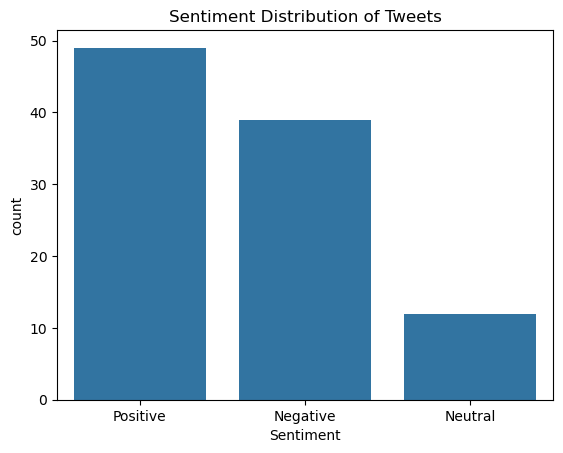

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Sentiment')
plt.title("Sentiment Distribution of Tweets")
plt.show()


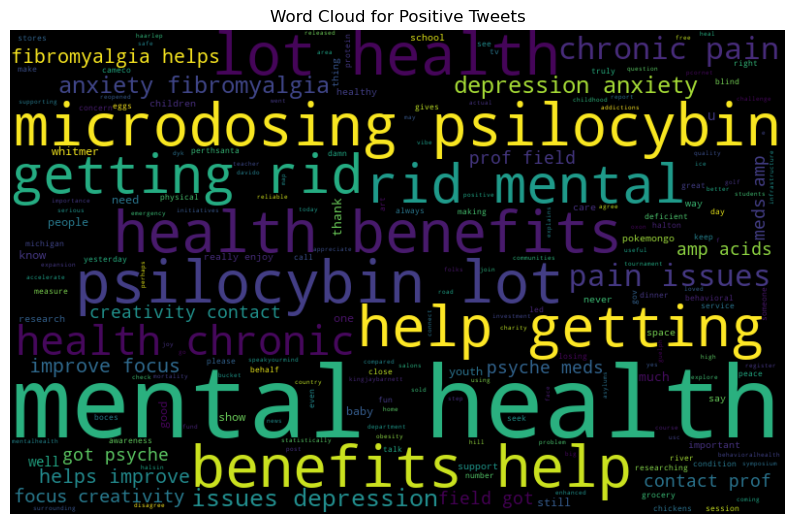

In [33]:
from wordcloud import WordCloud

all_words = " ".join([text for text in df[df['Sentiment']=='Positive']['Clean_Tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud for Positive Tweets")
plt.show()


In [34]:
#Export result

In [40]:
df.to_csv("twitter_sentiment_analysis.csv", index=False)